In [75]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# #Exploratory Data Analysis

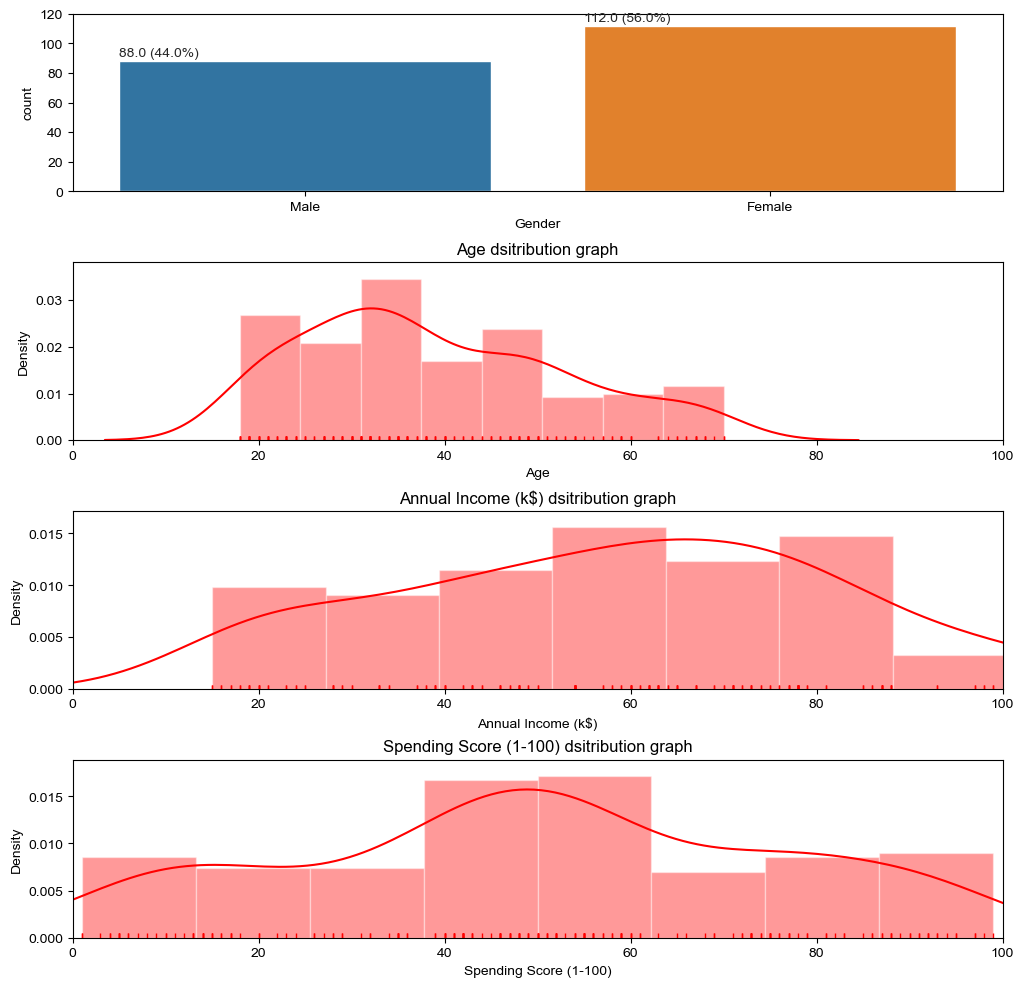

In [5]:
g, h = plt.subplots(4,1, figsize=(12,12))
plt.subplots_adjust(hspace=0.4)


sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df,ax=h[0])
h[0].set_ylim(0,120)
total = len(df)

for p in h[0].patches:
    height=p.get_height()
    h[0].text(p.get_x(),height+3,'{} ({:.1f}%)'.format(height,height/total*100), ha="left")

a=1
for col in df.columns[2:5]:
  sns.distplot(df[col],ax=h[a], rug=True, color='red')
  h[a].set_xlim(0,100)
  h[a].set_title('{} dsitribution graph'.format(col))
  a+=1


Text(0.5, 1.0, 'Age and Spending Score (1-100) scatterplot')

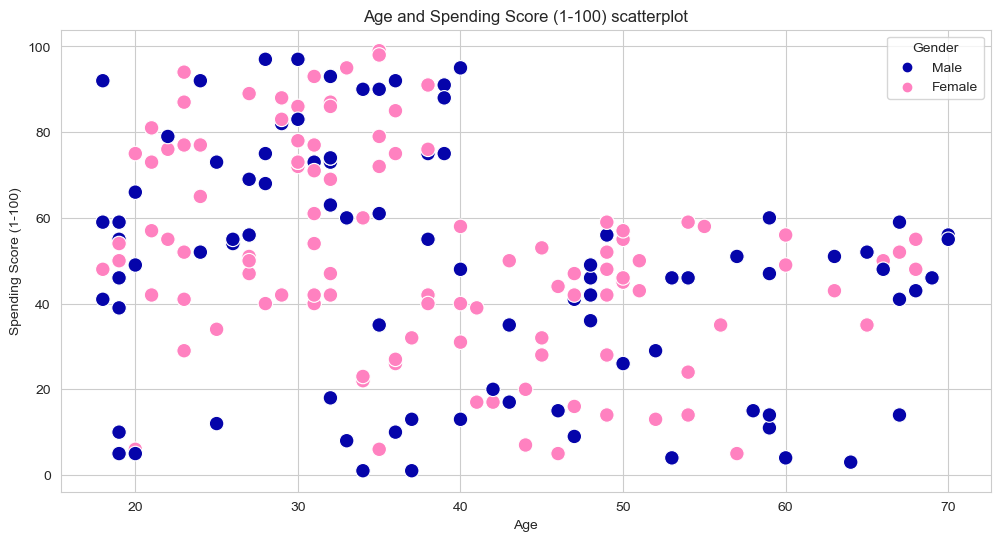

In [6]:
plt.figure(figsize=(12,6))
x='Age'
y='Spending Score (1-100)'
s=sns.scatterplot(x=x,y=y,data=df,hue='Gender',palette=sns.xkcd_palette(['royal blue','pink']),s=110)
s.set_title('{} and {} scatterplot'.format(x,y))

Text(0.5, 1.0, 'Spending Score (1-100) and Annual Income (k$) scatterplot')

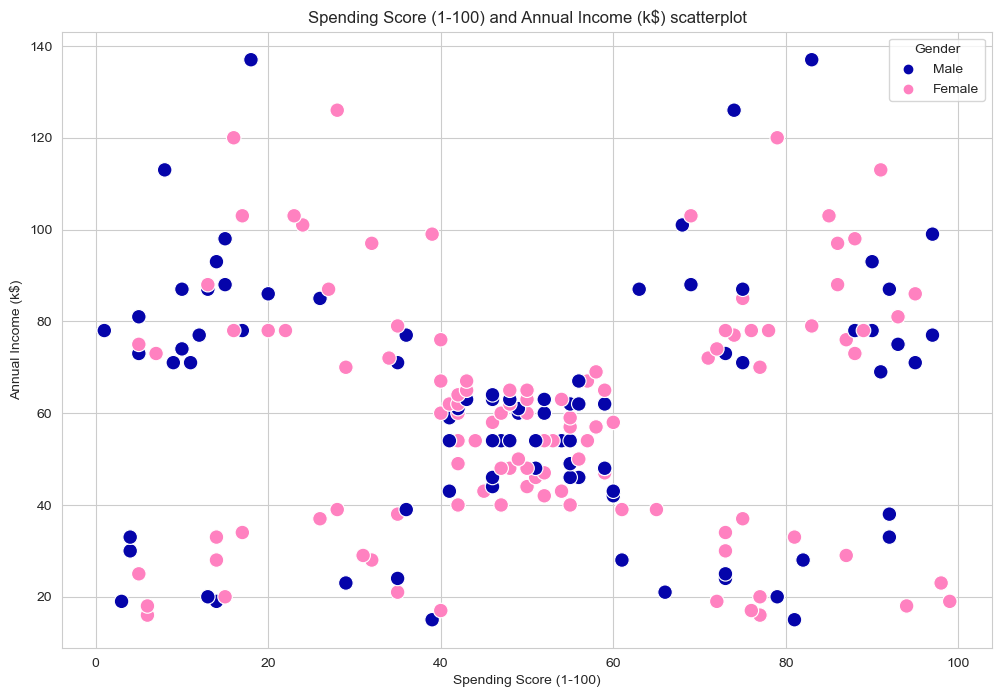

In [7]:
plt.figure(figsize=(12,8))
x='Spending Score (1-100)'
y='Annual Income (k$)'
s=sns.scatterplot(x=x,y=y,data=df,hue='Gender',palette=sns.xkcd_palette(['royal blue','pink']),s=110)
s.set_title('{} and {} scatterplot'.format(x,y))

# Convert gender into dummy variables first before plotting the correlationheatmap and pairplot

In [8]:
dfnew = pd.get_dummies(df,columns=['Gender'],drop_first=True)

<Axes: >

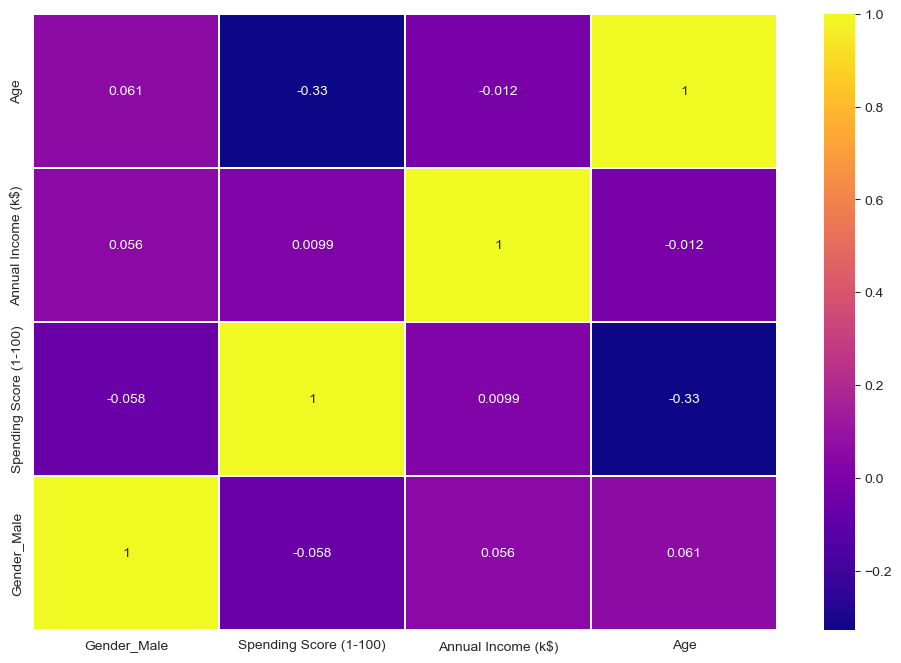

In [9]:
# Heat Map with Drown 1 dummy variable
plt.figure(figsize=(12,8))
correlation_matrix = dfnew[dfnew.columns[1:]].corr()
correlation_matrix = correlation_matrix.iloc[:,::-1]
sns.heatmap(correlation_matrix, annot=True, cmap='plasma',linecolor='w',linewidth=0.1)

In [10]:
#Heat Map with One Hot Coding for both Categorical Genders
dfnewOHC = pd.get_dummies(df,columns=['Gender'])
dfnewOHC['Gender_Female']= dfnewOHC['Gender_Female'].astype(int)
dfnewOHC['Gender_Male']= dfnewOHC['Gender_Male'].astype(int)
dfnewOHC.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


<Axes: >

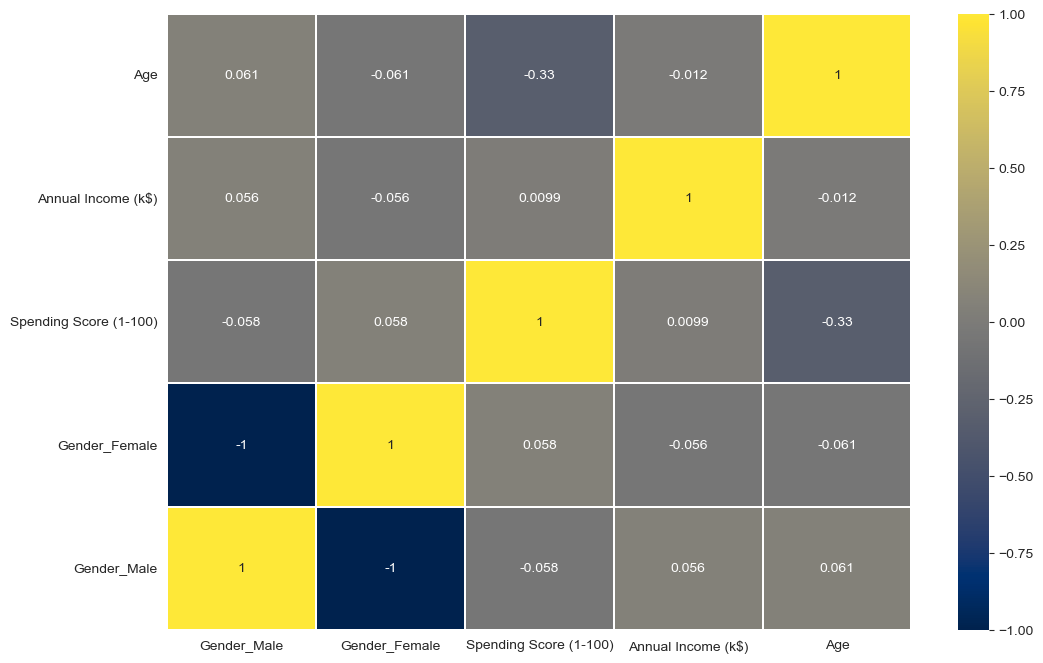

In [11]:
plt.figure(figsize=(12,8))
correlation_matrix_OHC = dfnewOHC[dfnewOHC.columns[1:]].corr()
correlation_matrix_OHC = correlation_matrix_OHC.iloc[:,::-1]
sns.heatmap(correlation_matrix_OHC, cmap='cividis', annot=True, linecolor='w',linewidth=0.2)

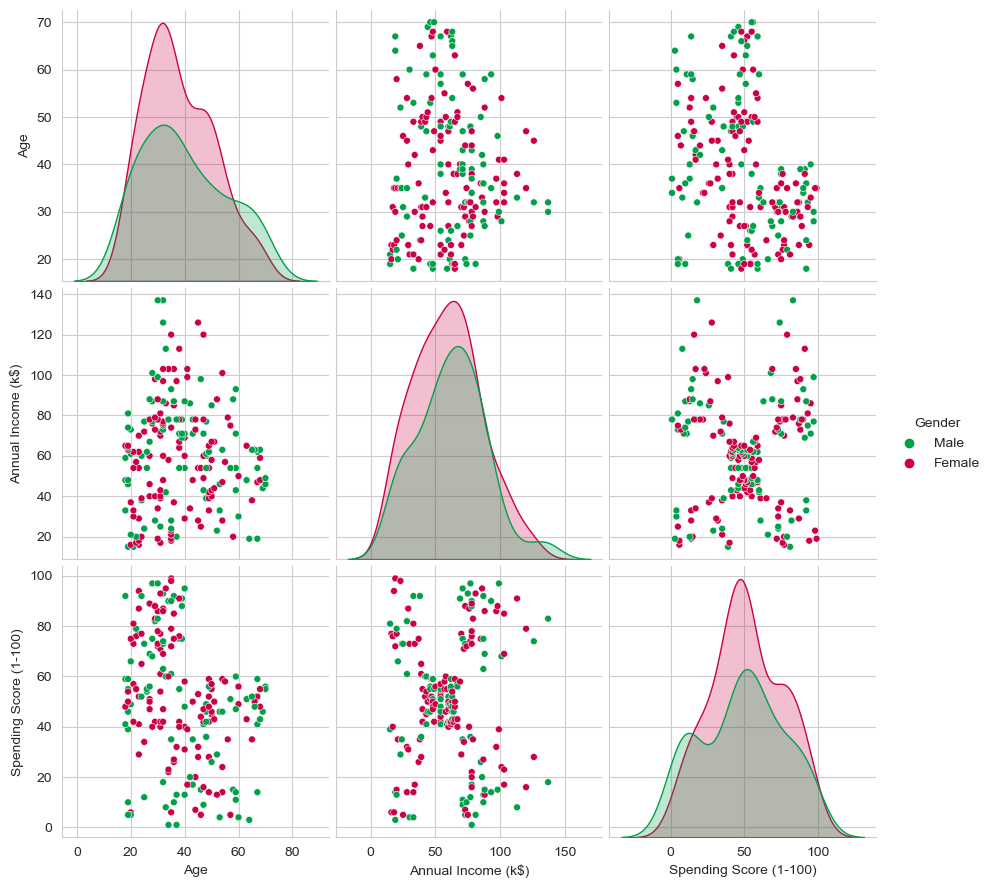

In [12]:
sns.pairplot(df[df.columns[1:]],palette=sns.xkcd_palette(['emerald','ruby']),hue='Gender',height=3, plot_kws={"s":25})


# Dropping ID columns 

In [13]:
dfnew1 = dfnew.drop('CustomerID', axis=1)
dfnew1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


# Clustering Data using K-Means Algorithm: Elbow Method

In [14]:

#Using the Annual Income and Spending score as the clustering factors
#Using the elbow method to find that sudden change of drop value of the WCSS for the optimal number of clusters


from sklearn.cluster import KMeans
#[1:3] means only getting first 2 columns, Annual Income and Spending Score
dfnew1_cluster = dfnew1[dfnew1.columns[1:3]].values
K = range(1,20)
wcss = []
for k in K:
    km = KMeans(n_clusters=k,init='k-means++',max_iter=500,n_init=20,random_state=69)
    km.fit(dfnew1_cluster)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

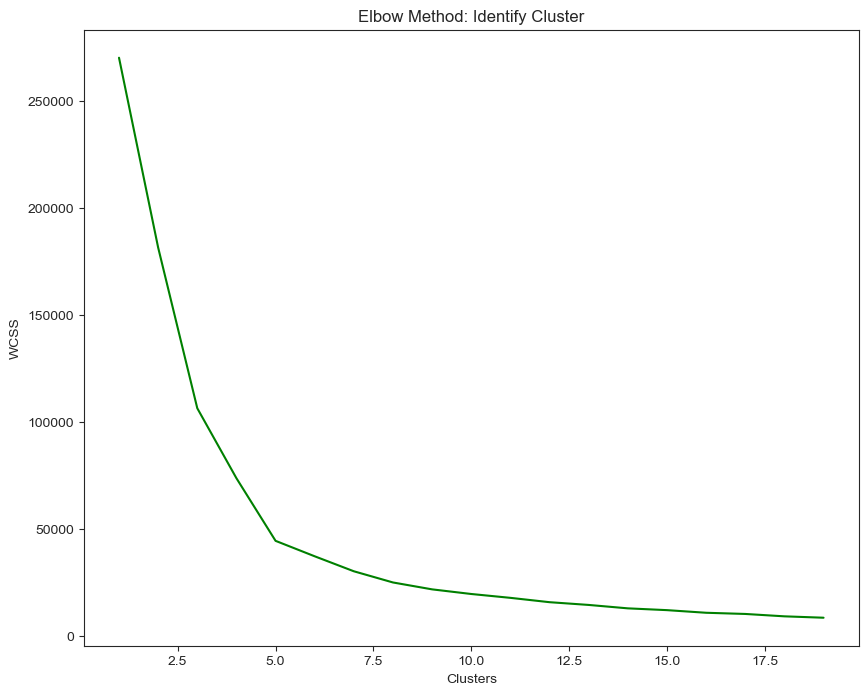

In [15]:
plt.figure(figsize=(10,8))

sns.set_style('ticks')
y = sns.lineplot(x=K,y=wcss,color='g')
y.set_title('Elbow Method: Identify Cluster')
y.set_xlabel("Clusters")
y.set_ylabel("WCSS")

In [16]:
#From above , we see that the optimal cluster count is 5
#hence we re-plot when k=5, for the dataframe that has both Genders
#df_no_id = df[df.drop('CustomerID',axis=1).columns[-3:]]
km = KMeans(n_clusters = 5,init='k-means++',max_iter=500,n_init=20,random_state=69)
kcluster = km.fit_predict(dfnew1)

AttributeError: 'Axes' object has no attribute 'tight_layout'

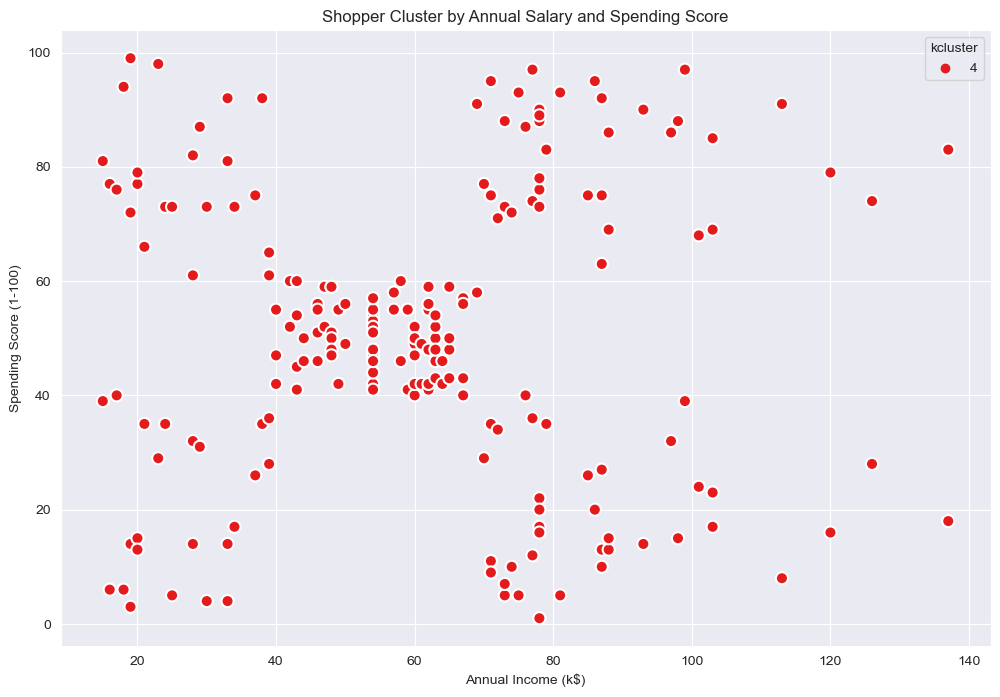

In [42]:
#plot the clusters in the dataset
dfkmeans = df
dfkmeans['kcluster']=kcluster
dfkmeans['kcluster_name']=None

for index, row in dfkmeans.iterrows():
    if row['kcluster']==0:
        dfkmeans.at[index,'kcluster_name'] = 'Mid Income, Mid Spender'
    elif row['kcluster'] == 1:
        dfkmeans.at[index,'kcluster_name'] = 'Low Income, High Spender'
    elif row['kcluster'] == 2:
        dfkmeans.at[index,'kcluster_name'] = 'High Income, High Spender'
    elif row['kcluster'] == 3:
        dfkmeans.at[index,'kcluster_name']= 'High Income, Low Spender'
    elif row['kcluster'] == 4:
        dfkmeans.at[index,'kcluster_name'] = 'Low Income, Low Spender'
        
        
plt.figure(figsize=(12,8))
y='Spending Score (1-100)'
x='Annual Income (k$)'
g=sns.scatterplot(x=x,y=y, data = dfkmeans ,hue='kcluster',palette='Set1',s=76,linewidth=1.5,edgecolor='w' )
g.set_title("Shopper Cluster by Annual Salary and Spending Score")

g.tight_layout()
#legend setting
g.legend(title='KM Clusters',fontsize=7.5, )
legend = g.legend_

for i, kcluster in enumerate(range(5)):
    if kcluster == 0:
        label = 'Mid Income, Mid Spender'
    elif kcluster == 1:
        label = 'Low Income, High Spender'
    elif kcluster == 2:
        label = 'High Income, High Spender'
    elif kcluster == 3:
        label = 'High Income, Low Spender'
    elif kcluster == 4:
        label = 'Low Income, Low Spender'
    legend.get_texts()[i].set_text(label)

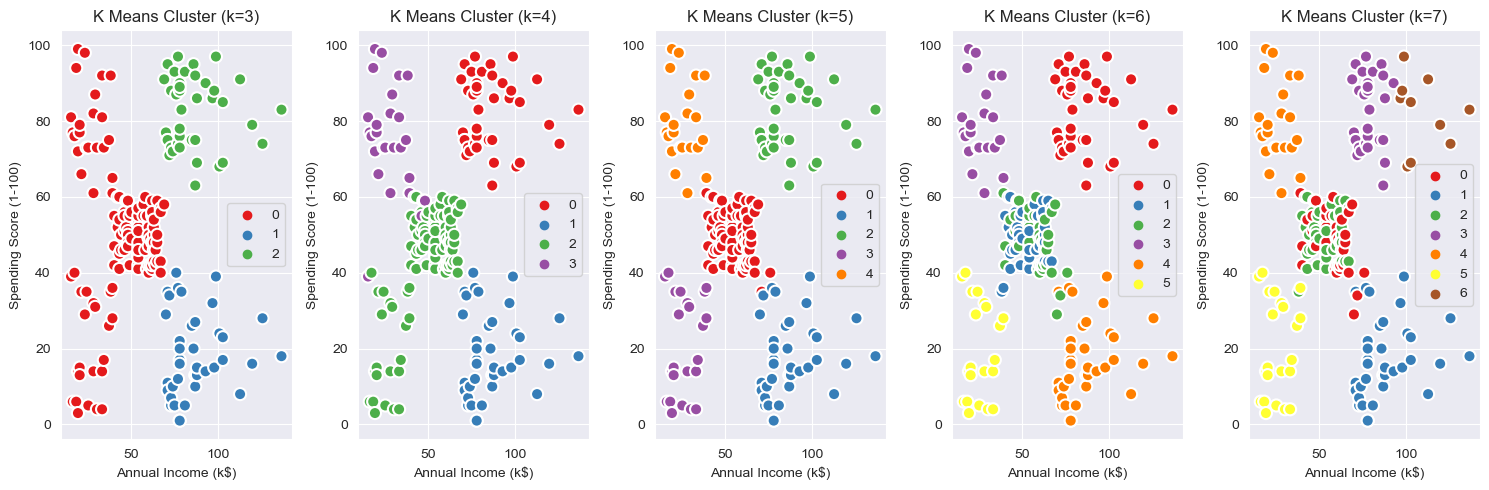

In [55]:
#lets look how it will be for other values of K
k_values = range(3, 8)
wccs = []

y = 'Spending Score (1-100)'
x = 'Annual Income (k$)'

# Create subplots for each value of k
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i,k in enumerate(k_values):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=500, random_state=420, n_init=20)
    kclusters = km.fit_predict(dfnew1)
    wccs.append(km.inertia_)
    
    # Use the correct variable name 'kclusters' for hue
    g = sns.scatterplot(x=x, y=y, data=dfnew1, hue=kclusters, palette='Set1', s=76, linewidth=1.5, edgecolor='w', ax=axes[i])
    g.set_title('K Means Cluster (k={})'.format(k))

plt.tight_layout()  # Adjust layout
#plt.show()

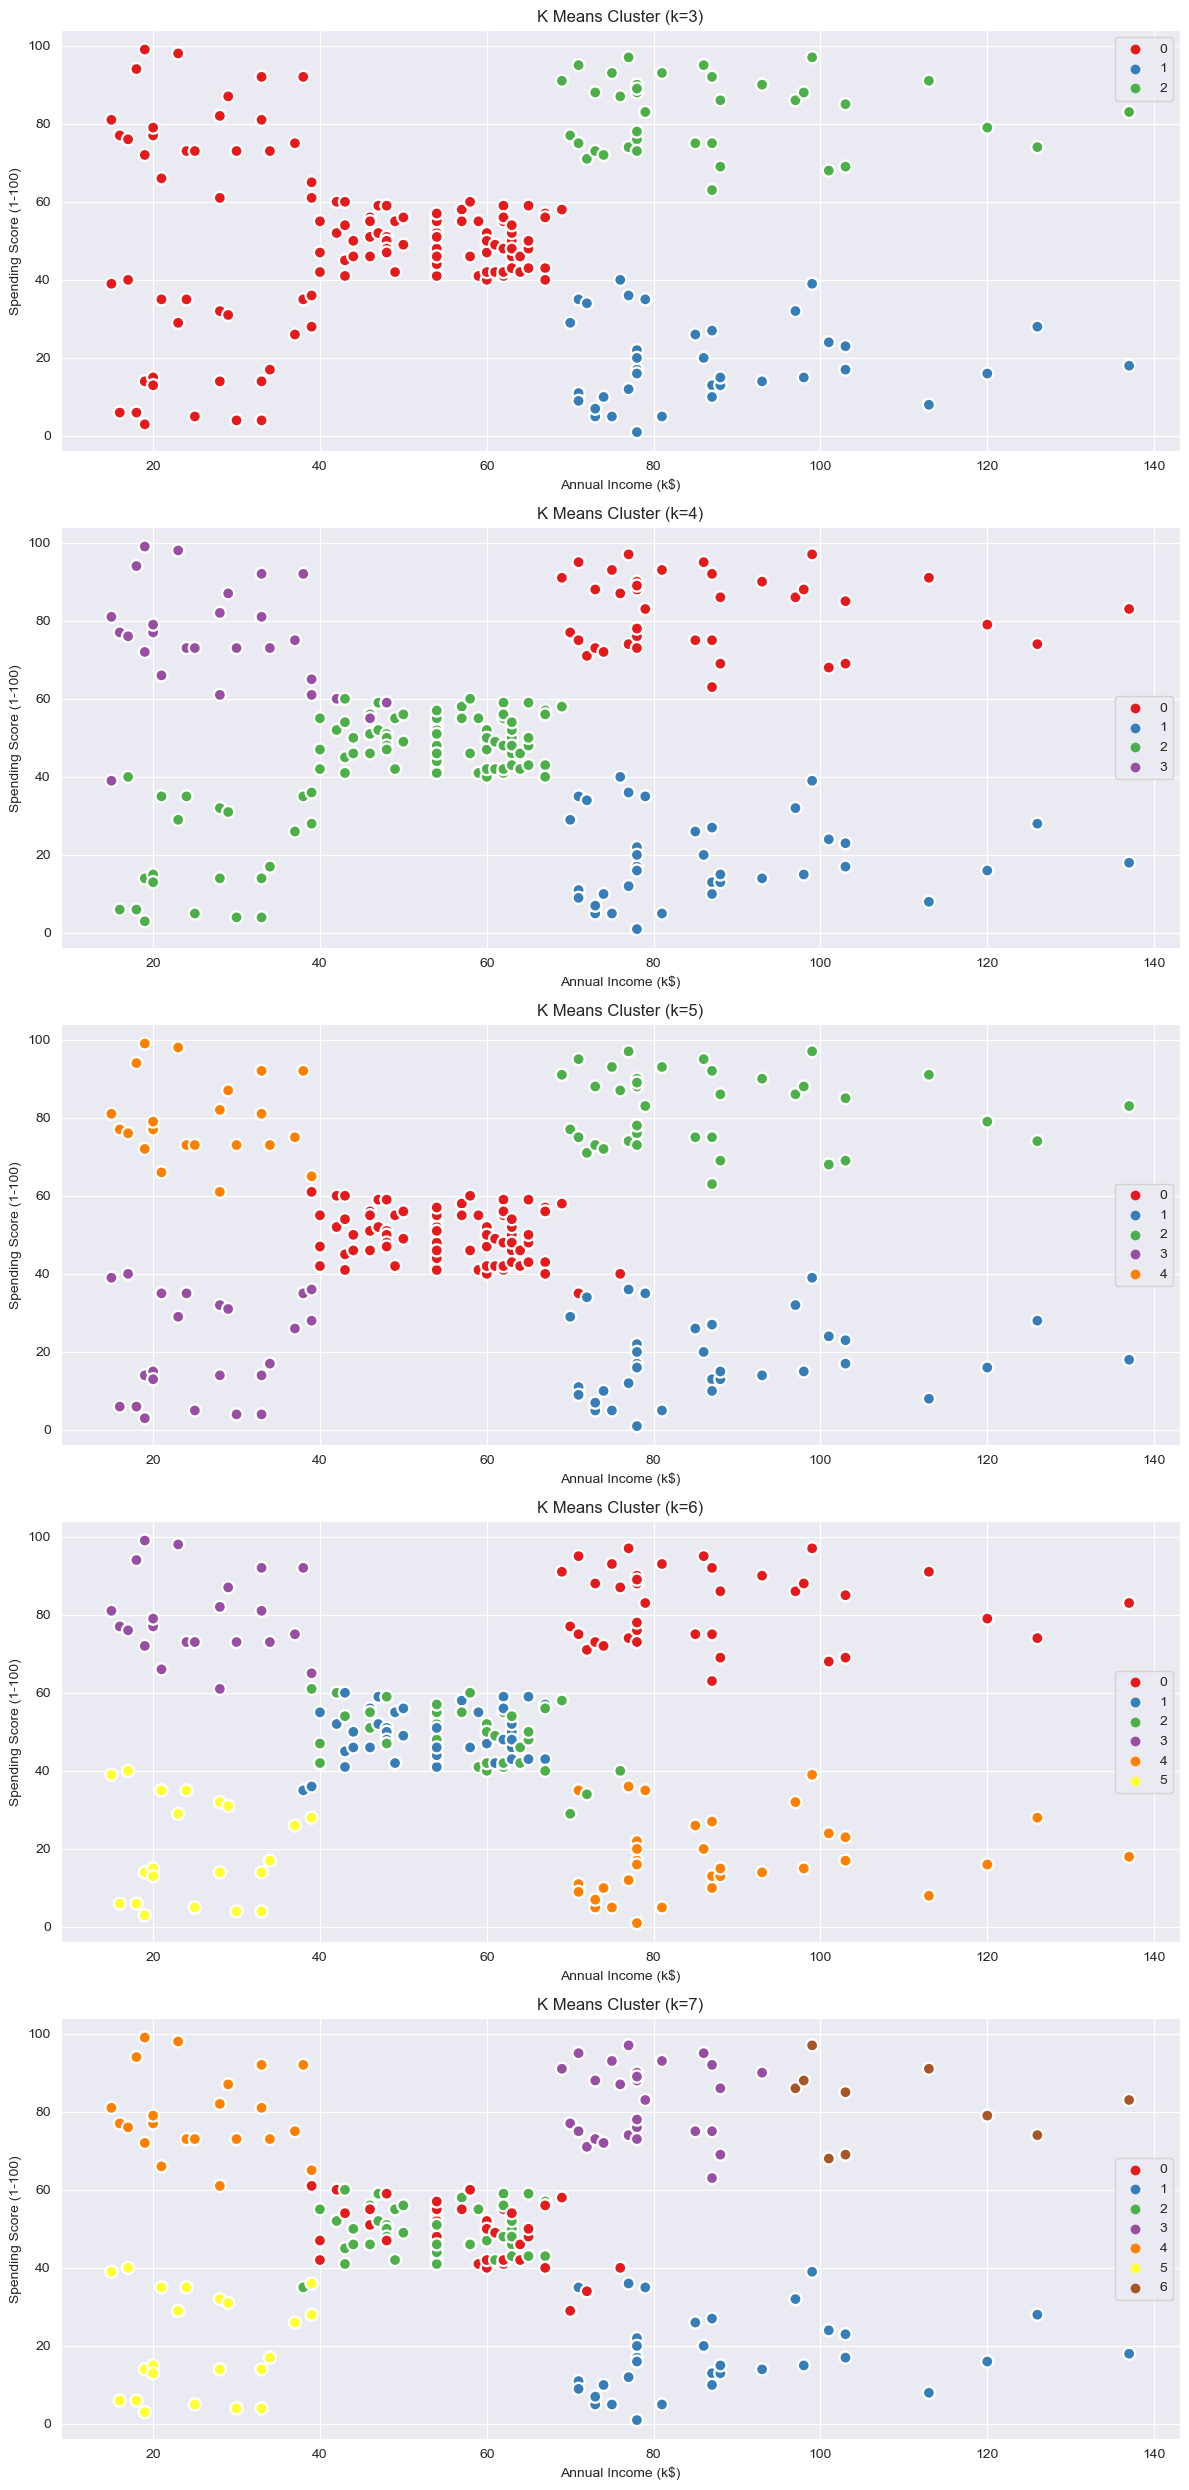

In [73]:
#Another Subplot View

y = 'Spending Score (1-100)'
x = 'Annual Income (k$)'
k_values = range(3, 8)

fig, axes = plt.subplots(len(k_values),1, figsize=(12,5*len(k_values)))
plt.subplots_adjust(hspace=0.4)


for i,k in enumerate(k_values):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=500, random_state=420, n_init=20)
    kclusters = km.fit_predict(dfnew1)
    wccs.append(km.inertia_)
    g = sns.scatterplot(x=x,y=y,data=dfnew1, hue=kclusters, palette='Set1',s=76, linewidth=1.7,edgecolor='w', ax=axes[i])
    g.set_title('K Means Cluster (k={})'.format(k))
plt.tight_layout()
    

In [19]:
dfkmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kcluster,kcluster_name
0,1,Male,19,15,39,4,"Low Income, Low Spender"
1,2,Male,21,15,81,0,"Mid Income, Mid Spender"
2,3,Female,20,16,6,4,"Low Income, Low Spender"
3,4,Female,23,16,77,0,"Mid Income, Mid Spender"
4,5,Female,31,17,40,4,"Low Income, Low Spender"


# Clustering Data using K-Means Algorithm: Heirarchical Clustering Algorithn

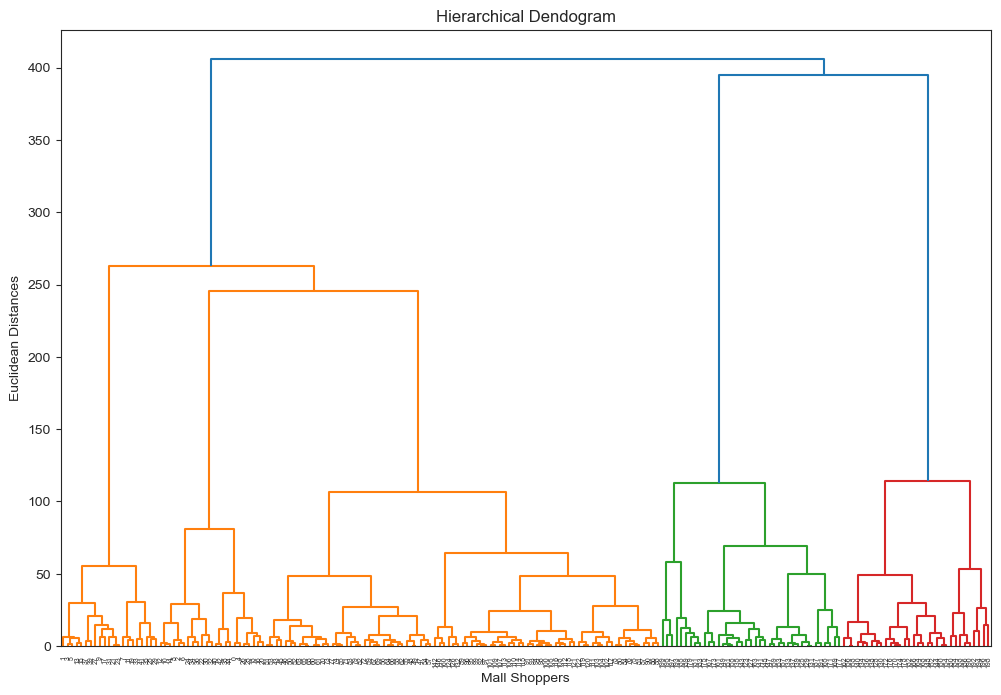

In [20]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
#the linkage() expects an array, hence we use dfnew1_cluster because dfnew1_cluster = dfnew1.values
dendrogram = sch.dendrogram(sch.linkage(dfnew1_cluster,method='ward'))
plt.title('Hierarchical Dendogram')
#Mall Shoppers are described by a combination of their Spending and Income features
plt.xlabel('Mall Shoppers')
plt.ylabel('Euclidean Distances')
plt.show()

In [21]:
#From above we see, one of the longest Vertical that dont have at least 1 horizontal line is the area of ~230-~110. So we can
#Draw a horizontal line (imaginary) there. If we do that, there will be 5 linkages, hence 5 clusters

#We apply agglomerative clustering, which is counterpart of from sklearn.cluster import KMeans



from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
hccluster = hc.fit_predict(dfnew1)
dfkmeans['hccluster'] = hccluster

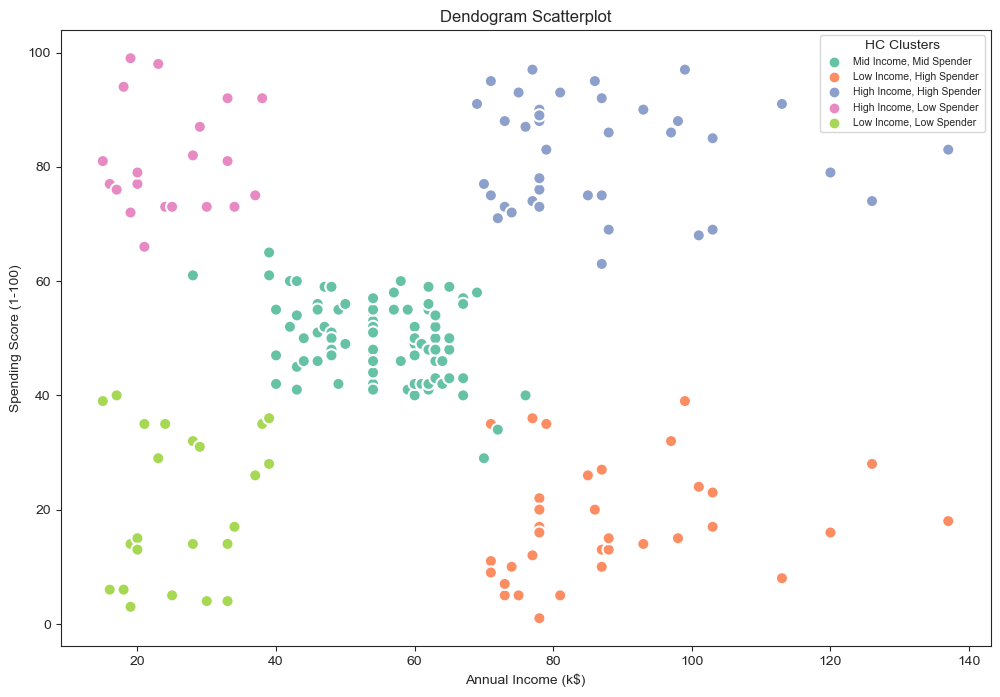

In [22]:
plt.figure(figsize=(12,8))
y='Spending Score (1-100)'
x='Annual Income (k$)'
u = sns.scatterplot(x=x,y=y, data=dfkmeans, hue=hccluster, palette='Set2', s=76,linewidth = 1.5, edgecolor='w' )
u.set_title("Dendogram Scatterplot")


dfkmeans['hccluster_name']=None
for index, row in dfkmeans.iterrows():
    if row['hccluster']==0:
        dfkmeans.at[index,'hccluster_name'] = 'Mid Income, Mid Spender'
    elif row['hccluster'] == 1:
        dfkmeans.at[index,'hccluster_name'] = 'High Income, Low Spender'
    elif row['hccluster'] == 2:
        dfkmeans.at[index,'hccluster_name'] = 'High Income, High Spender'
    elif row['hccluster'] == 3:
        dfkmeans.at[index,'hccluster_name']= 'Low Income, High Spender'
    elif row['hccluster'] == 4:
        dfkmeans.at[index,'hccluster_name'] = 'Low Income, Low Spender'
        
#legend Setting
u.legend(title='HC Clusters',fontsize=7.5)
legend = u.legend_

for i, hccluster in enumerate(range(5)):
    if hccluster==0:
        label = 'Mid Income, Mid Spender'
    elif hccluster==1:
        label = 'Low Income, High Spender'
    elif hccluster==2:
        label = 'High Income, High Spender'
    elif hccluster==3:
        label =  'High Income, Low Spender'
    elif hccluster==4:
        label ='Low Income, Low Spender'
    legend.get_texts()[i].set_text(label)
    
    
        

In [23]:
#check similarities between kcluster and hccluster
dfkmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kcluster,kcluster_name,hccluster,hccluster_name
0,1,Male,19,15,39,4,"Low Income, Low Spender",4,"Low Income, Low Spender"
1,2,Male,21,15,81,0,"Mid Income, Mid Spender",3,"Low Income, High Spender"
2,3,Female,20,16,6,4,"Low Income, Low Spender",4,"Low Income, Low Spender"
3,4,Female,23,16,77,0,"Mid Income, Mid Spender",3,"Low Income, High Spender"
4,5,Female,31,17,40,4,"Low Income, Low Spender",4,"Low Income, Low Spender"


In [24]:

(dfkmeans['kcluster_name']==dfkmeans['hccluster_name']).value_counts()

False    174
True      26
Name: count, dtype: int64

In [25]:
dfkmeans

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kcluster,kcluster_name,hccluster,hccluster_name
0,1,Male,19,15,39,4,"Low Income, Low Spender",4,"Low Income, Low Spender"
1,2,Male,21,15,81,0,"Mid Income, Mid Spender",3,"Low Income, High Spender"
2,3,Female,20,16,6,4,"Low Income, Low Spender",4,"Low Income, Low Spender"
3,4,Female,23,16,77,0,"Mid Income, Mid Spender",3,"Low Income, High Spender"
4,5,Female,31,17,40,4,"Low Income, Low Spender",4,"Low Income, Low Spender"
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,"High Income, Low Spender",2,"High Income, High Spender"
196,197,Female,45,126,28,1,"Low Income, High Spender",1,"High Income, Low Spender"
197,198,Male,32,126,74,3,"High Income, Low Spender",2,"High Income, High Spender"
198,199,Male,32,137,18,1,"Low Income, High Spender",1,"High Income, Low Spender"


In [26]:
#the names are never matching because of randomness so fine, let's skip this part

# 3D model and factor in Age against (Annual Income and Spending)

In [27]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kcluster,kcluster_name,hccluster,hccluster_name
0,1,Male,19,15,39,4,"Low Income, Low Spender",4,"Low Income, Low Spender"
1,2,Male,21,15,81,0,"Mid Income, Mid Spender",3,"Low Income, High Spender"
2,3,Female,20,16,6,4,"Low Income, Low Spender",4,"Low Income, Low Spender"


In [28]:
df_3dc = df[df.columns[2:5]]
df_3dc.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Text(0, 0.5, 'WCSS')

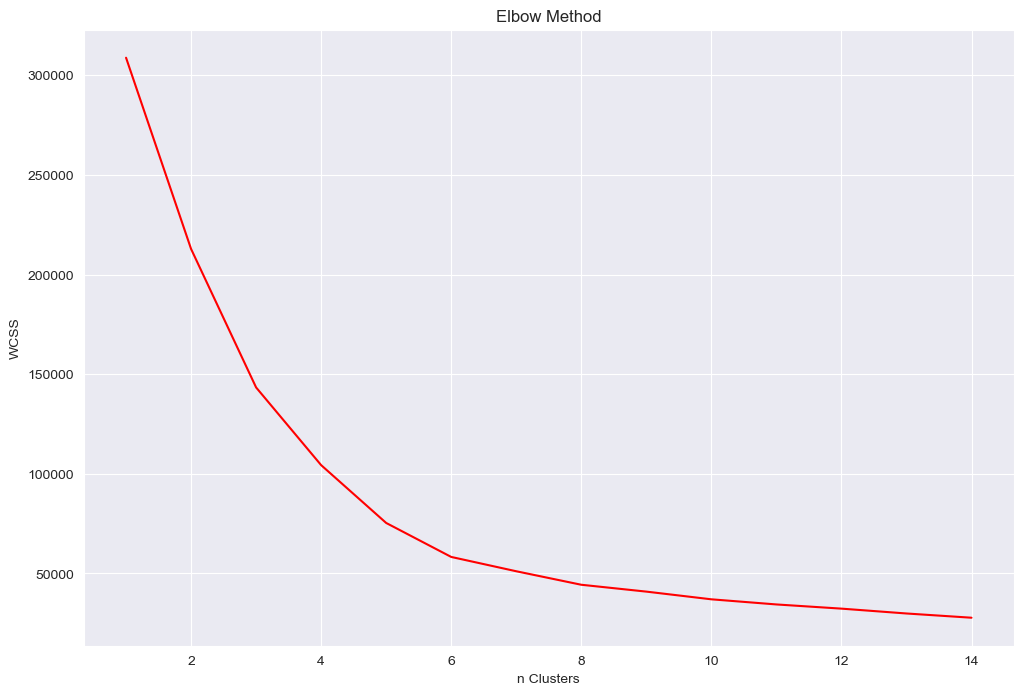

In [29]:
df_3dc = df[df.columns[2:5]].values
K = range(1,15)
wcss = []

for k in K:
    km = KMeans(n_clusters = k, init='k-means++', random_state=69, max_iter=500, n_init=20)
    km.fit(df_3dc)
    wcss.append(km.inertia_)
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

g = sns.lineplot(x=K, y=wcss, color='r')
g.set_title ('Elbow Method')
g.set_xlabel('n Clusters')
g.set_ylabel('WCSS')

In [30]:
#from above it looks to be that there optimal clusters is 6 as that is where linearity starts

Text(0.5, 0, 'Spending Score (1-100)')

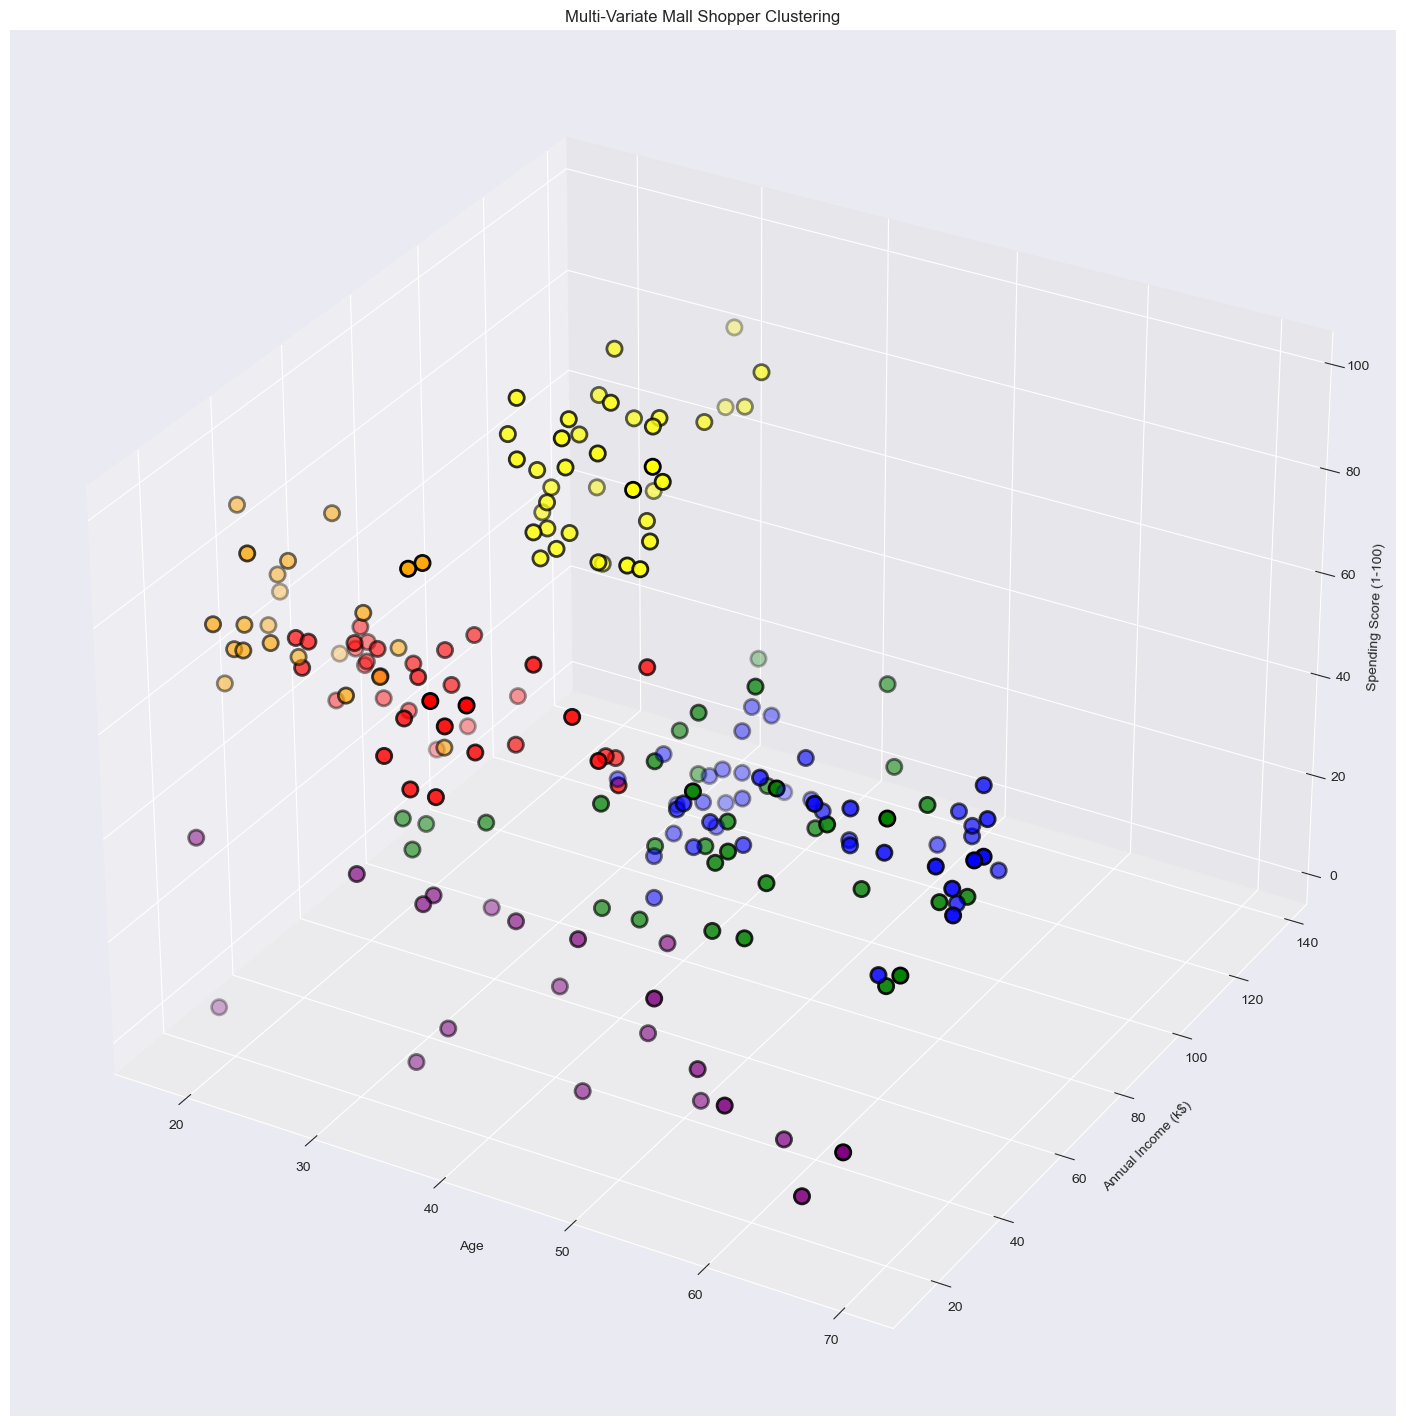

In [37]:
km3d = KMeans(n_clusters=6, max_iter = 500, init='k-means++', random_state=76, n_init=20)
kcluster3d = km3d.fit_predict(dfnew1)

fig = plt.figure(figsize=(18,18))

g = fig.add_subplot(111, projection='3d')

#We have 6 clusters so we need kcluster3d in range (0,6)
x_cluster0 = df_3dc[kcluster3d == 0 , 0]
y_cluster0 = df_3dc[kcluster3d == 0 , 1]
z_cluster0 = df_3dc[kcluster3d == 0 , 2]

x_cluster1 = df_3dc[kcluster3d == 1 , 0]
y_cluster1 = df_3dc[kcluster3d == 1 , 1]
z_cluster1 = df_3dc[kcluster3d == 1 , 2]

x_cluster2 = df_3dc[kcluster3d == 2 , 0]
y_cluster2 = df_3dc[kcluster3d == 2 , 1]
z_cluster2 = df_3dc[kcluster3d == 2 , 2]

x_cluster3 = df_3dc[kcluster3d == 3 , 0]
y_cluster3 = df_3dc[kcluster3d == 3 , 1]
z_cluster3 = df_3dc[kcluster3d == 3 , 2]

x_cluster4 = df_3dc[kcluster3d == 4 , 0]
y_cluster4 = df_3dc[kcluster3d == 4 , 1]
z_cluster4 = df_3dc[kcluster3d == 4 , 2]

x_cluster5 = df_3dc[kcluster3d == 5 , 0]
y_cluster5 = df_3dc[kcluster3d == 5 , 1]
z_cluster5 = df_3dc[kcluster3d == 5 , 2]

#Then we plot it in the ScatterPlots

# Scatter plot for cluster 0 with descriptive variable names
g.scatter(x_cluster0, y_cluster0, z_cluster0, s=120, color='blue', label="Cluster 1", edgecolor='k', linewidth=2)
g.scatter(x_cluster1, y_cluster1, z_cluster1, s=120, color='red', label="Cluster 2", edgecolor='k', linewidth=2)
g.scatter(x_cluster2, y_cluster2, z_cluster2, s=120, color='yellow', label="Cluster 3", edgecolor='k', linewidth=2)
g.scatter(x_cluster3, y_cluster3, z_cluster3, s=120, color='green', label="Cluster 4", edgecolor='k', linewidth=2)
g.scatter(x_cluster4, y_cluster4, z_cluster4, s=120, color='orange', label="Cluster 5", edgecolor='k', linewidth=2)
g.scatter(x_cluster5, y_cluster5, z_cluster5, s=120, color='purple', label="Cluster 6", edgecolor='k', linewidth=2)

g.set_title("Multi-Variate Mall Shopper Clustering")
g.set_xlabel("Age")
g.set_ylabel("Annual Income (k$)")
g.set_zlabel("Spending Score (1-100)")
